# Исследование данных о российском кинопрокате

###  Цель исследования - изучить рынок российского кинопроката и выявить текущие тренды.  Выяснить сколько фильмов выходило в прокат каждый год, как менялась динамика проката по годам. Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате. Уделить внимание фильмам, которые получили государственную поддержку.Выяснить, насколько такие фильмы интересны зрителю. 

Данные взяты с портала Министерства культуры и содержат информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [18]:
import pandas as pd  # импортируем необходимые для исследования библиотеки
import matplotlib.pyplot as plt
import datetime

import warnings

In [19]:
warnings.filterwarnings("ignore")

In [4]:
try: 
    df_movies = pd.read_csv(r'C:\Users\Виталий\Downloads\mkrf_movies.csv') # Открываем таблицу "mkrf_movies"
except: 
    df_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

In [5]:
try: 
    df_shows = pd.read_csv(r'C:\Users\Виталий\Downloads\mkrf_shows.csv')  # Открываем таблицу "mkrf_shows"
except: 
    df_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [6]:
df_movies.info() # Ознакомление с данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_shows.head(20)

,puNumber,box_office
0,111000113,2450.000
1,111000115,61040.000
2,111000116,153030013.400
3,111000117,12260956.000
4,111000118,163684057.790
5,111000119,4293649.510
6,111000212,200.000
7,111000216,355567.000
8,111000313,710.000
9,111000314,1607970.000


Имеем два набора данных. В датафрейме`df_movies` (таблица `mkrf_movies`) хранятся сведения о прокатных удостоверениях. У одного фильма может быть несколько прокатных удостоверений. 

Значения признаков: 

* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма (также включает в себя полный объём государственной поддержки. Данные в этом признаке указаны только для тех фильмов, которые получили государственную поддержку);
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.

Датафрейм `df_shows` (таблица `mkrf_shows`) содержит сведения о показах фильмов в российских кинотеатрах.

Значения признаков:
* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

<b> Исходя из информации, представленной в таблицах, видим, что в обоих файлах есть общий признак `puNumber`, по которому мы можем произвести слияние датафреймов в один. За основу берем `df_movies` как более ценный для анализа. Однако, тип данных в `df_movies` - `'object'`, поэтому сначала нужно изменить тип данных. </b>

In [10]:
df_movies['puNumber'].sort_values() # ищем нечисловые значения

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

In [11]:
df_movies.loc[df_movies['puNumber'] == 'нет', 'puNumber'] = None 

Заменили значение `'нет'` в столбце на NaN. Возвращаемся к изменению типа данных и слиянию таблиц.

In [12]:
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'])

In [13]:
df = df_movies.merge(df_shows, on='puNumber', how='outer')

<b> Датафрейм `df`с объединенными сведениями готов. В дальнейшем будем работать с ним. Приступим к первичному ознакомлению с данными. </b>

In [14]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.000,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.000,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.000,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.000,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.000,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [16]:
df.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

<b> Всего имеем 15 признаков сведений и 7486 объектов (каждый - отдельный фильм). Наблюдаются пропуски в `puNumber`, `film_studio`, `production_country`, `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `genres` и `box_office`. </b>

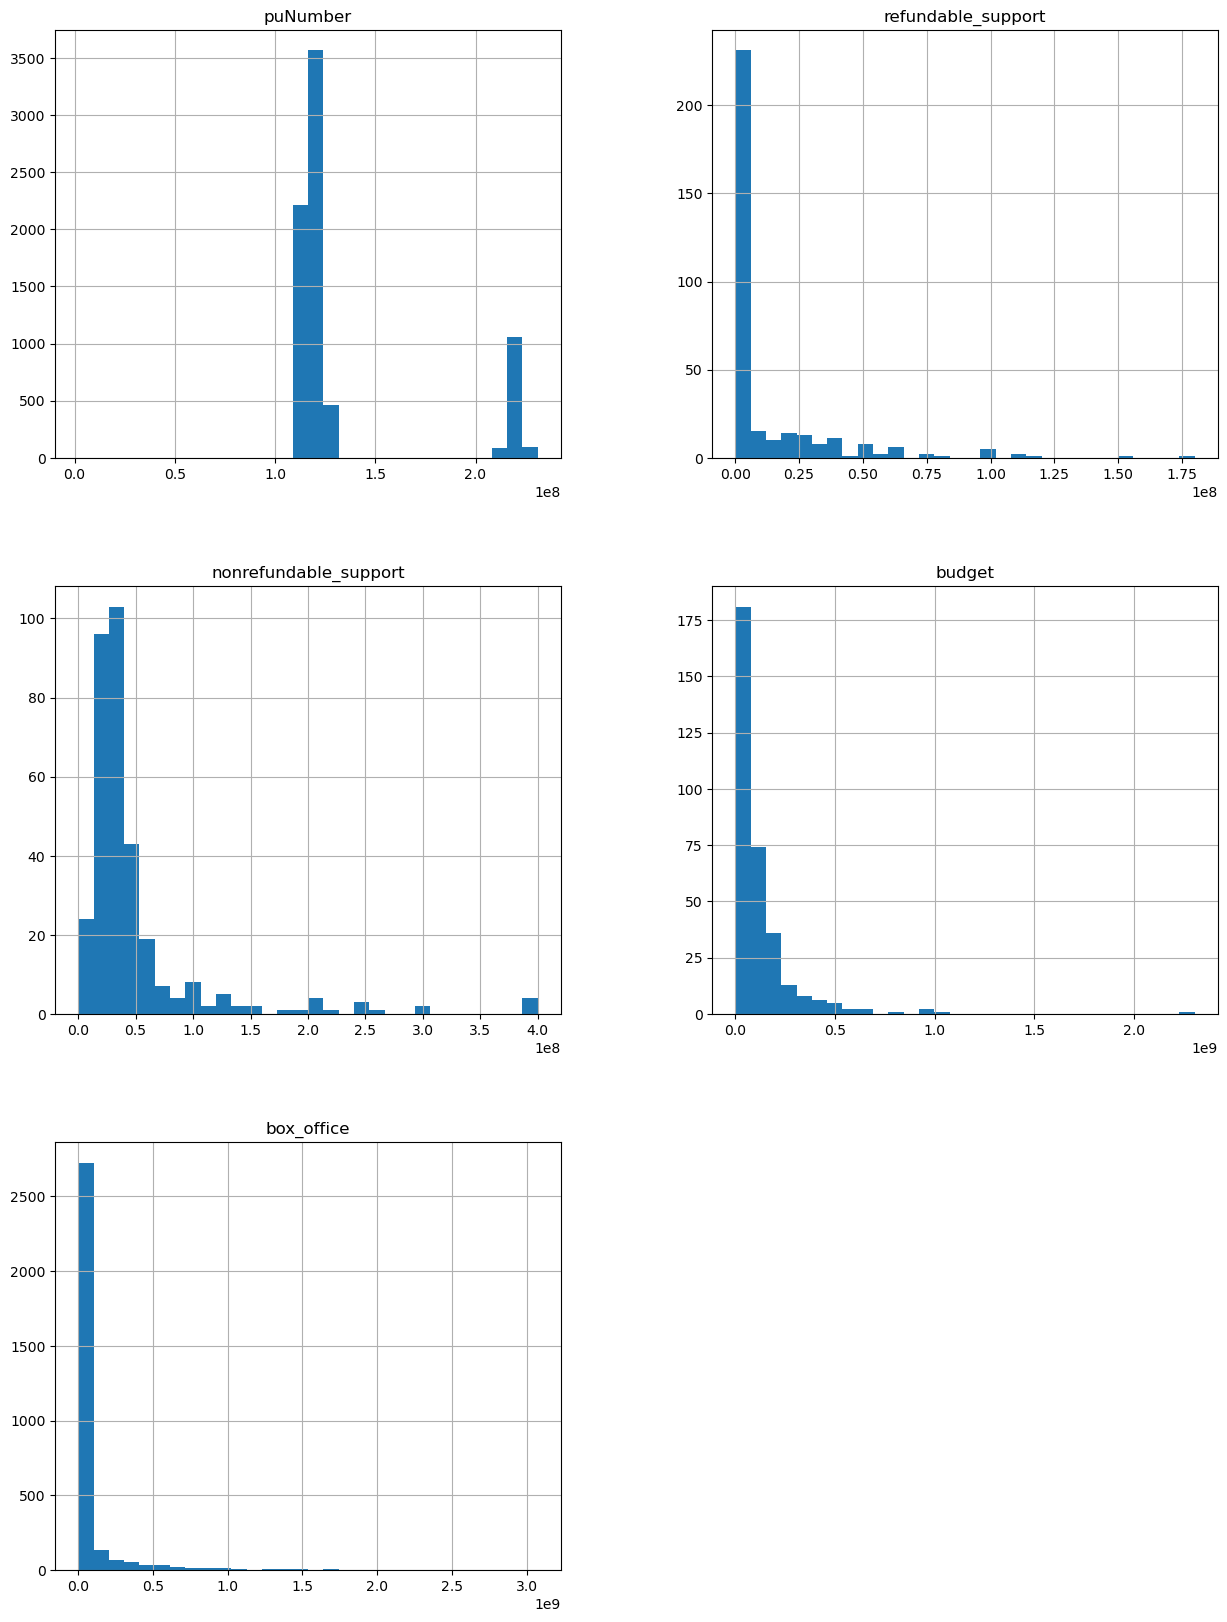

In [17]:
df.hist(figsize=(15,20), bins=30);  # Построем гистограммы для признаков, где в качестве типа данных указан float64
plt.show()

<b> Поскольку в признаках имеются пропуски, подробно останавливаться на них до предобработки сейчас не будем. Стоит отметить, однако, что гистограммы `budget`, `refundable_support` и `nonrefundable_support`похожи между собой и напоминают распределение Пуассона - в каждом признаке есть несколько значений, число которых сильно превалирует над остальными. </b>

In [16]:
df.duplicated().sum() # Явные дупликаты отсутствуют. 

0

### Промежуточный итог к первому пункту

<b> Судя по первым 20 строкам датафрейма, в категориальных значениях, например, названия фильма или студии, будет много неявных дупликатов. Только в 4 признаках из 15 отсутствуют пропуски. Искажены типы данных (например, в признаке, где хранятся даты). Вероятно, наиболее правильным способом предобработки данных будет сначала пройтись по всем признакам слева направо, где хранятся категориальные значения, затем - количественные. </b>

## 2. Предобработка данных

### Признаки с категориальными значениями

#### `title`

In [17]:
df['title'].nunique()

6772

In [18]:
df[df['title'].duplicated()].sort_values(by ='title').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712.000,2012-06-06T12:00:00.000Z,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
5058,127 часов,221069011.000,2011-05-18T12:00:00.000Z,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
3130,13 часов: Тайные солдаты Бенгази,121001016.000,2016-01-15T12:00:00.000Z,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",18439240.550
1494,13-й район: Кирпичные особняки,121008314.000,2014-04-25T12:00:00.000Z,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"боевик,криминал",750.000
4307,13.,121018110.000,2010-09-30T12:00:00.000Z,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"триллер,драма,криминал",NaN
2282,300 спартанцев: Расцвет империи /По произведен...,221025414.000,2014-07-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Леджендари Пикчерз, Круэль/Уну...",США,Ноам Мурро,"Марк Кэнтон, Джанни Нуннари, Дебора Снайдер, З...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,военный",NaN
5004,7 дней и ночей с Мэрилин,121024711.000,2011-12-27T12:00:00.000Z,Художественный,"БиБиСи Филмз, Вайнштейн Компани, Трэйдмарк Фил...",Великобритания-США,Саймон Кертис,Дэвид Парфитт,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.9,"драма,биография",NaN
1664,9 месяцев строгого режима,121032413.000,2013-12-20T12:00:00.000Z,Художественный,"Уалд Банч, Франс 2 Синема, Синефранс 1888, А Д...",Франция,Альбер Дюпонтель,Катрин Бозорган,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.9,"комедия,криминал,детектив",NaN
3989,Аватар_,221067810.000,2010-05-14T12:00:00.000Z,Художественный,"ХХ век Фокс, Дан Интертейнмент, Гиант Студиос,...",США,Джеймс Кэмерон,"Брук Бретон, Джеймс Кэмерон, Джон Лондау",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,драма",NaN
3924,Аватар_,121008910.000,2010-05-12T12:00:00.000Z,Художественный,"ХХ век Фокс, Дан Интертейнмент, Гиант Студиос,...",США,Джеймс Кэмерон,"Брук Бретон, Джеймс Кэмерон, Джон Лондау",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,драма",6950.000


In [19]:
df['title'].value_counts().head(20)

День святого Валентина_                                        5
Знакомство с Факерами 2.                                       4
Красавчик-2                                                    4
Непокоренный.                                                  4
Прощание                                                       4
Начало_                                                        4
Кошмар на улице Вязов /Фильм ужасов/                           4
Там, где живут чудовища                                        4
Шерлок Холмс                                                   4
Белоснежка и охотник                                           4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
Секс в большом городе 2                                        4
Дом грёз                                                       4
Химера                                                         4
Код доступа "Кейптаун"                                         4
Двойной копец            

Судя по наиболее частотным значениям, многие названия фильмов искажены - лишние знаки препинания, ненужные вставки, такие как /по книге.../ и т.д. От этого всего мы можем избавиться.

In [20]:
df['title'] = df['title'].str.strip()

In [21]:
df['title'] = df['title'].str.lower()

In [22]:
def remove_slash(row):   # функция, которая удалит дополнительные вставки после символа "/". Добавлено условие, чтобы исключить фильмы, названия которых начинаются со слеша
    value = row.split(sep ='/')
    if value[0] == "":
        return value[1]
    else:
        return value[0]

In [23]:
def remove_bracket(row):   # функция, которая удалит дополнительные вставки об авторе после символов "()".
    value = row.split(sep ='(')
    if value[0] == "":
        return value[1]
    else:
        return value[0]

In [24]:
df['title'] = df['title'].apply(remove_slash)

In [25]:
df['title'] = df['title'].apply(remove_bracket)

In [26]:
df = df.apply(lambda x: x.replace({'_': ''}, regex=True)) # убираем нижние подчеркивания и далее другие знаки препинания

In [20]:
df['title'] = df['title'].str.replace('.','')

In [21]:
df['title'] = df['title'].str.replace(')','')

In [29]:
df['title'] = df['title'].str.replace(':','')

In [30]:
df['title'] = df['title'].str.replace(',','')

In [31]:
df['title'] = df['title'].str.replace('-','')

In [32]:
df['title'].nunique()

6613

In [33]:
df[df['title'].duplicated()].sort_values(by ='title').head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
779,10 лет спустя,221002813.000,2013-01-15T12:00:00.000Z,Художественный,"Энчо Бай Филмз, Босс Медиа, Темпл Хилл Интерте...",США,Джеми Линден,"Марти Бауэн, Вик Годфри, Рейд Каролин, Ченнинг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"драма,мелодрама,комедия",NaN
455,100 миллионов евро,121013712.000,2012-06-06T12:00:00.000Z,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
5058,127 часов,221069011.000,2011-05-18T12:00:00.000Z,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
4307,13,121018110.000,2010-09-30T12:00:00.000Z,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"триллер,драма,криминал",NaN
3130,13 часов тайные солдаты бенгази,121001016.000,2016-01-15T12:00:00.000Z,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",18439240.550
1494,13й район кирпичные особняки,121008314.000,2014-04-25T12:00:00.000Z,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"боевик,криминал",750.000
2094,300 спартанцев расцвет империи,221014914.000,2014-05-27T12:00:00.000Z,Художественный,"Уорнер Бразерс, Леджендари Пикчерз, Круэль/Уну...",США,Ноам Мурро,"Марк Кэнтон, Джанни Нуннари, Дебора Снайдер, З...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,военный",NaN
2282,300 спартанцев расцвет империи,221025414.000,2014-07-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Леджендари Пикчерз, Круэль/Уну...",США,Ноам Мурро,"Марк Кэнтон, Джанни Нуннари, Дебора Снайдер, З...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,военный",NaN
2281,300 спартанцев расцвет империи,221022014.000,2014-07-15T12:00:00.000Z,Художественный,"Уорнер Бразерс, Леджендари Пикчерз, Круэль/Уну...",США,Ноам Мурро,"Марк Кэнтон, Джанни Нуннари, Дебора Снайдер, З...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,военный",NaN
5004,7 дней и ночей с мэрилин,121024711.000,2011-12-27T12:00:00.000Z,Художественный,"БиБиСи Филмз, Вайнштейн Компани, Трэйдмарк Фил...",Великобритания-США,Саймон Кертис,Дэвид Парфитт,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.9,"драма,биография",NaN


<b> В `title` хранятся названия кинолент. Пропусков здесь нет, но на 7486 строк - более 6.5 тыс различных значений. Пока трудно сказать, являются ли остальные строки неявными дупликатами, т.к., согласно заданию, у одного фильма может быть несколько прокатных удостоверений и, следовательно, он может упоминаться в датафрейме несколько раз. При необходимости вернемся к данному признаку позднее. </b>

#### `type`

In [34]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [35]:
df['type'].value_counts() # Проверяем уникальные значения

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

В `type` нет пропусков, но найдены неявные дупликаты - в некоторых значениях есть лишние пробелы. 

In [36]:
df['type'] = df['type'].replace(' Художественный', 'Художественный')

In [37]:
df['type'] = df['type'].replace(' Анимационный', 'Анимационный')

In [38]:
df['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [39]:
df.query('type == "Музыкально-развлекательный"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6624,баския взрыв реальности,126004118.000,2019-01-17T12:00:00.000Z,Музыкально-развлекательный,Магнолия Пикчерз,США,Сара Драйвер,"Рэйчел Денгиз, Сара Драйвер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.9,документальный,1416635.000


In [40]:
df.query('type == "Научно-популярный"').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1036,на волне,113000112.000,2012-07-10T12:00:00.000Z,Научно-популярный,"ООО ""ИнВейвс Продакшн""",Россия,И.Блохина,И.Блохина,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.5,"аниме,мультфильм,мелодрама",NaN
1291,супервулканы,126002214.000,2014-06-04T12:00:00.000Z,Научно-популярный,"Спитц, Инк.",США,Томас Лукас,"Робин Сип, Майк Бруно, Томас Лукас",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.8,"триллер,драма",17783670.000
1292,темная материя,126002314.000,2014-06-04T12:00:00.000Z,Научно-популярный,Университет Западной Австралии,Австралия,Питер Морс,"Питер Морс, Пол Берк",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.3,"фантастика,триллер,драма",NaN
3322,подвиг евгения кобытева,113000117.000,2017-04-12T12:00:00.000Z,Научно-популярный,"ООО ""ЛИСПО""",Россия,Д.Хананов,С.Лившиц,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3762,24 снега,113000116.000,2016-06-03T12:00:00.000Z,Научно-популярный,Макаров Егор Петрович,Россия,М.Барынин,Е.Макаров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.8,документальный,492710.500
3804,добро пожаловать югагарин!,113000110.000,2010-01-28T12:00:00.000Z,Научно-популярный,"Киностудия ""Центрнаучфильм""",СССР,Д.Боголепов,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3953,океаны,123000110.000,2010-08-19T12:00:00.000Z,Научно-популярный,Патэ,Франция-Испания-Швейцария,"Жак Перрен, Жак Клюзо","Джейк Эбертс, Дон Хан, Николя Моверне",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.3,"документальный,драма,семейный",5830.000
4318,морские динозавры 3d путешествие в доисторичес...,123000210.000,2010-09-16T12:00:00.000Z,Научно-популярный,"Мантелло Бразерс, Эн 3 Ди Лэнд Продакшнз",Франция - Великобритания,"Паскаль Вонг, Ронан Чапалэйн","Кэтрин Вонг, Паскаль Вонг, Франсуа Мантелло",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.9,"документальный,короткометражка",1446400.000
4376,морские динозавры 3d путешествие в доисторичес...,223013710.000,2010-10-01T12:00:00.000Z,Научно-популярный,"Мантелло Бразерс, Эн 3 Ди Лэнд Продакшнз",Франция - Великобритания,"Паскаль Вонг, Ронан Чапалэйн","Кэтрин Вонг, Паскаль Вонг, Франсуа Мантелло",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.9,"документальный,короткометражка",NaN
4780,деликатес,113000210.000,2010-02-02T12:00:00.000Z,Научно-популярный,"ОАО ""Леннаучфильм""",Россия,М.Кондрикова,В.Бажин,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"комедия,криминал,драма",NaN


<b> Итак, у нас есть один "музыкально-развлекательный" фильм (при этом его жанр - документальный). Странное сочетание, возможно, здесь ошибка, но пока оставим строку. Научно-популярных фильмов по сравнению с другими значениями тоже немного, но каких-то явных несостыковок не видно. Пока все оставляем. Итого, пропусков нет, дупликаты устранены. </b> 

#### `film_studio`

In [41]:
df['film_studio'].nunique()

5490

In [42]:
df['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                 341
ООО "Мульт в кино"                                                                     57
Анимаккорд Лтд                                                                         23
ООО "Мульт в кино"                                                                     18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                 16
                                                                                     ... 
Чинериц, Франчинекс                                                                     1
Архимед, Лё Пакт, Рай Синема                                                            1
Обермаер Е.В.                                                                           1
Блумхауз Продакшнз, Менеджемент 360, Тремендюм Пикчерз, Уорнер Бразерс                  1
Парамаунт Плейз, Волден Медиа, Баа Продакшнс, Медиа Райс Кэпитал, Николодион Мувис      1
Name: film

Опять видим неявные дупликаты, попробуем устранить схожим методом, что и в `title`. 

In [43]:
df['film_studio'] = df['film_studio'].str.strip()

In [44]:
df['film_studio'] = df['film_studio'].str.lower()

In [45]:
df = df.apply(lambda x: x.replace({'"': '', 'киностудия ': '', 'ооо ': '', 'кинокомпания ': '', 'студия ': ''}, regex=True))
# Чтобы ибавиться от неявных дупликатов, попробуем очистить значения от разных приставок

In [46]:
df['film_studio'].value_counts().head(10)

мосфильм                                              345
мульт в кино                                           75
анимаккорд лтд                                         23
таббак                                                 18
фгуп тпо союзмультфильм                                16
р а и синема                                           14
опус арте                                              14
анимационного кино мельница                            14
пиксар анимейшн студиос, уолт дисней пикчерз           13
ств                                                    13
зао аэроплан                                           12
энджой мувиз                                           11
дримуоркс анимейшн                                     11
уолт дисней пикчерз                                    11
свердловская киностудия                                10
стар медиа дистрибьюшн                                 10
оао тпо санкт-петербургская документальных фильмов     10
эр а и синема 

In [47]:
df['film_studio'].nunique()

5397

Больше 5 тысяч уникальных значений - по самым популярным вариантов повторов нет (кое-где названия студий, конечно дублируются, тот же Дисней, но они могут быть в увязке с другой компанией, поэтому будем считать их разными). 

In [48]:
df[df['film_studio'].isna()] # смотрим строки, где пропущены данные

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,stars in shorts,121011114.000,2014-06-03T12:00:00.000Z,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,мульт личности выпуск 5,214000410.000,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,значит любит,111013818.000,2018-08-10T12:00:00.000Z,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,несейка младшая дочь,112007018.000,2018-09-01T12:00:00.000Z,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,ян антонышев,112011818.000,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,ян антонышев,112011918.000,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,доживем до каникул?,111021918.000,2018-11-15T12:00:00.000Z,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.000
6485,до и после,112014418.000,2018-12-05T12:00:00.000Z,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,калмыцкий геше нгаванг вангьял,113002018.000,2018-12-05T12:00:00.000Z,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,мой папа чингисхан,112014918.000,2018-12-06T12:00:00.000Z,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df['film_studio'].isna().sum()

18

In [50]:
print(df['film_studio'].isna().sum() / len(df['film_studio']))

0.0024044883783061713


Всего 18 пропусков, причем 16 фильмов из среза сделаны в России, 1 в США и 1 неизвестно. По сути, их наличие может означать не только техническую ошибку, но и отсутствие студии как таковой (например, какой-то инди-проект, большое число документальных фильмов тому подтверждение). В любом случае, пропусков мало (0.2% от всех данных), поэтому можем от них просто избавиться. 

In [51]:
df = df.dropna(subset=['film_studio'])

<b> Пропуски и неявные дупликаты (по возможности) удалены. </b>

#### `production_country`

In [52]:
df['production_country'].value_counts().head(20)

США                     2172
Россия                  1805
СССР                     347
Франция                  301
Великобритания           257
Италия                   129
Германия                 110
США - Великобритания      88
Япония                    77
Испания                   74
Франция - Бельгия         55
Канада                    52
Австралия                 50
США - Канада              44
Великобритания - США      40
КНР                       33
Республика Кипр           31
США-Австралия             29
США - Франция             29
США - Германия            29
Name: production_country, dtype: int64

In [53]:
df['production_country'].nunique()

950

In [54]:
df[df['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,детский юмористический киножурнал ералаш ну пр...,111001216.000,2016-02-09T12:00:00.000Z,Художественный,продюсерский центр ералаш,NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...",ООО Продюсерский центр ЕРАЛАШ,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.000


Всего один пропуск. Ералаш выходил и в СССР, и в РФ, поэтому точно определить, к какой стране добавить фильм, не получится. Проще будет удалить строку. 

In [55]:
df = df.dropna(subset=['production_country'])

In [56]:
df = df.apply(lambda x: x.replace({'США-Германия': 'США - Германия', 'США-Австралия': 'США - Австралия', 'Великобритания - США':'США - Великобритания', 'Великобритания-США':'США - Великобритания', 'Россия-Кипр': 'Россия - Кипр', 'США-Франция': 'США - Франция', 'США-Великобритания': 'США - Великобритания', 'Франция - США':'США - Франция', 'Россия, Республика Кипр':'Россия - Кипр', 'США-Канада': 'США - Канада', 'Франция, Бельгия': 'Франция - Бельгия' }, regex=True))
# удалим наиболее частотные неявные дупликаты

In [57]:
df['production_country'].nunique()

936

<b> Немного сократили число дупликатов среди наиболее частотных и убрали один пропуск. </b>

#### `director`

In [58]:
df['director'].nunique()

4796

In [59]:
df['director'].value_counts().head(30)

О.Семёнова          47
Д.Червяцов          17
Стивен Содерберг    17
Ридли Скотт         16
Тиль Швайгер        14
Питер Джексон       13
Вуди Аллен          13
Клинт Иствуд        13
О.Семёнова          12
Дэвид Финчер        12
Люк Бессон          12
Стивен Спилберг     12
Кевин Смит          12
П.Смирнов           11
Саймон Уэст         11
Кристофер Нолан     11
Гай Ричи            11
Джеймс Ван          10
Роберт Земекис      10
С.Андреасян         10
Роберт Швентке      10
Тьерри Гиллиам      10
Николас Столлер     10
Л.Гайдай            10
Питер Берг           9
Франсуа Озон         9
Дэвид Йейтс          9
Тодд Филлипс         9
Джон Фавро           8
Джастин Лин          8
Name: director, dtype: int64

In [60]:
df['director'] = df['director'].str.strip()

In [61]:
df['director'] = df['director'].str.lower()

In [62]:
df['director'] = df['director'].str.replace('ё', 'е')

In [63]:
df['director'].nunique()

4767

Немного сократили число неявных дупликатов. У российских авторов используются инициалы имени и фамилия, у зарубежных - имена без сокращений.

In [64]:
df[df['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,три звезды концерт в waldbuhne theater берлин ...,126003512.000,2012-12-04T12:00:00.000Z,Прочие,райзинг алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.000
1735,помпеи британский музей,126003413.000,2013-09-11T12:00:00.000Z,Прочие,"мортускрин, британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,зур концерт,217027010.000,2010-06-24T12:00:00.000Z,Художественный,барс рекордс,Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,ганс сэйфуллин авылым чишмэлэре ганс сэйфуллин...,217017310.000,2010-04-22T12:00:00.000Z,Художественный,барс-рекордс,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,изге вэли,217020610.000,2010-05-20T12:00:00.000Z,Художественный,барс рекордс,Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,bon jovi the circle tour,126001710.000,2010-11-11T12:00:00.000Z,Прочие,эншутц интертейнмент груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4923,георг фридрих гендель мессия оратория королевс...,126001111.000,2011-04-25T12:00:00.000Z,Прочие,опус арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,питер гэбриэл и new blood orchestra 3d,126002711.000,2011-11-11T12:00:00.000Z,Прочие,омниверс визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


Всего 8 пропусков, можем от них спокойно избавиться. 

In [65]:
df = df.dropna(subset=['director'])

<b> Таким образом, пропусков здесь нет, избавились от нескольких дупликатов. </b>

#### `producer`

In [66]:
df['producer'].nunique()

5329

In [67]:
df['producer'].value_counts().head(30)

П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            17
Кевин Фейги                                      11
Тони Майерс                                      11
Джерри Брукхаймер                                11
А.Тельнов                                        11
Н.Мокрицкая                                       9
С.Говорухин, Е.Маскина                            9
ООО Продюсерский центр ЕРАЛАШ                     9
С.Сельянов, А.Боярский                            9
Э.Пичугин                                         9
Тиль Швайгер                                      8
А.Герасимов                                       8
Б.Машковцев, С.Струсовский                        8
Фил Грабски                                       8
ООО Стар Медиа Дистрибьюшн                        8
Г.Васильев, М.Мэннис, И.Попов                     8
ФГУП Кинокон

In [68]:
df['producer'] = df['producer'].str.strip()

In [69]:
df['producer'] = df['producer'].str.lower()

In [70]:
df['producer'].nunique()

5306

In [71]:
df[df['producer'].isna()].sort_values(by='production_country')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2426,человек невидимка,111024914.000,2014-12-24T12:00:00.000Z,Художественный,мосфильм,СССР,а.захаров,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.4,"фантастика,триллер,детектив",NaN
2423,двойной обгон,111024114.000,2014-12-24T12:00:00.000Z,Художественный,мосфильм,СССР,а.гордон,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.9,"боевик,криминал",NaN
1975,черный бизнес,111022414.000,2014-12-01T12:00:00.000Z,Художественный,мосфильм,СССР,в.журавлев,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,детектив,NaN
2060,человек которого я люблю,111025914.000,2014-12-24T12:00:00.000Z,Художественный,мосфильм,СССР,ю.карасик,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,мелодрама,NaN
498,джакомо пуччини богема,126001212.000,2012-04-03T12:00:00.000Z,Прочие,синема лайв,Австралия,гейл эвардс,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.0,"мелодрама,музыка",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5825,укрась прощальное утро цветами обещания,124001818.000,2018-04-19T12:00:00.000Z,Анимационный,"бандай вижуал, сигеймс, хакуходо ди мьюзик энд...",Япония,"мари окада, тошия шиохара",NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,"аниме,мультфильм,драма",14877801.960
7204,связанные миры,124006919.000,2019-09-19T12:00:00.000Z,Анимационный,крафтар студио,Япония,юхэй сакураги,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.1,"мелодрама,фэнтези,триллер",2488435.510
5794,девушки и танки,124001218.000,2018-04-05T12:00:00.000Z,Анимационный,хакуходо ди мьюзик энд пикчерз,Япония,цутому мидзусима,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,"аниме,мультфильм,комедия",3195765.000
6705,тетрадь дружбы нацумэ,124000619.000,2019-02-14T12:00:00.000Z,Анимационный,"шука, аниплекс",Япония,"такахиро омори, хидэки ито",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"аниме,мультфильм,драма",8335973.790


<b> В `producer` пропусков уже много - более 500. Просто удалить их не выйдет, это значительная часть датафрейма. Среди причин их появления могут быть как технические ошибки, так и отсутствие продюссеров в фильме как таковых (например, некие инди-фильмы). Пропущенные значения можем заменить на фразу "неизвестен/отсутствует". </b>

In [72]:
df['producer'] = df['producer'].fillna('неизвестен/отсутствует')

#### `age_restriction`

In [73]:
df['age_restriction'].value_counts().head(30)

«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1601
«12+» - для детей старше 12 лет           1584
«0+» - для любой зрительской аудитории     803
«6+» - для детей старше 6 лет              623
Name: age_restriction, dtype: int64

In [74]:
df[df['age_restriction'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


<b> Первый признак, где нет ни искаженных названий, ни пропусков. Оставляем как есть. </b>

#### `financing_source`

In [75]:
df['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [76]:
df['financing_source'].isna().sum()

7127

In [77]:
df['budget'].isna().sum()

7127

<b> В `financing_source` хранятся сведения о фильмах, получивших господдержку. Соответственно, данные неразрывно связаны с признаками `refundable_support`, `nonrefundable_support` и `budget`. Отсюда - и большое число пропусков. Представляется, что пока данные лучше оставить как есть, и разобраться с аномалиями/пропусками при разборе признаков с количественными данными. </b>

#### `genres`

In [78]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [79]:
df['genres'] = df['genres'].str.strip()

In [80]:
df['genres'] = df['genres'].str.lower()

In [81]:
df['genres'].value_counts()

драма                        476
комедия                      351
мелодрама,комедия            222
драма,мелодрама,комедия      189
драма,мелодрама              183
                            ... 
биография,военный,драма        1
фантастика,драма,детектив      1
драма,военный,триллер          1
боевик,драма,вестерн           1
семейный,детектив,детский      1
Name: genres, Length: 741, dtype: int64

In [82]:
df['genres'].isna().sum()

957

In [83]:
df[df['genres'].isna()].head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,мемуары гейши,121000606.000,2012-12-14T12:00:00.000Z,Художественный,"коламбия пикчерз корпорейшн, дримуоркс эскейдж...",США,роб маршалл,"стивен спилберг, люси фишер, дуглас уик, джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,жди меня,111013615.000,2015-08-25T12:00:00.000Z,Художественный,мосфильм,СССР,"а.столпер, б.иванов",неизвестен/отсутствует,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,дом из песка и тумана,221037813.000,2013-10-25T12:00:00.000Z,Художественный,кобальт пикчерз,США,вадим перельман,майкл лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,жемчужная девушка,224011014.000,2014-08-28T12:00:00.000Z,Художественный,"чешское телевидение,три брата агентской фирмы ...",Чехия,владимир дрга,неизвестен/отсутствует,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,полустанок,111026714.000,2014-12-24T12:00:00.000Z,Художественный,мосфильм,СССР,б.барнет,неизвестен/отсутствует,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,разбойник и принцесса,224010714.000,2014-08-28T12:00:00.000Z,Художественный,чешское телевидение,Чехия,карел смычек,неизвестен/отсутствует,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,пьетро масканьи сельская честь,126001812.000,2012-05-29T12:00:00.000Z,Прочие,эр а и синема,Италия,марио мартоне,ла скала,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,опера на льду,126001712.000,2012-05-29T12:00:00.000Z,Прочие,нексо диджитал,Италия,кристиан биодани,"джиглиола барбьери, паоло де биаси",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,франческо чилеа адриана лекуврёр,126000412.000,2012-02-07T12:00:00.000Z,Прочие,опус арте,Великобритания,дэвид маквикар,дэвид гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,артур сеймур салливан микадо постановка sydney...,126000212.000,2012-01-27T12:00:00.000Z,Прочие,синема лайв,Австралия,стюарт маундер,синема лайв,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b> Почти тысяча пропущенных значений. Причина их появления неясна (в срезе выше представлены сведения о самых разных фильмах). Вероятно, имела место какая-либо техническая ошибка. Пропуски заменим на "жанр не определен". </b>

In [84]:
df['genres'] = df['genres'].fillna('жанр не определен')

#### Промежуточный итог по категориальным сведениям

<b> Практически в каждом признаке данные были искажены - как правило, это либо лишние знаки препинания либо пробелы в названиях, что добавляет множество неявных дупликатов. От некоторых удалось избавиться, но, очевидно, не от всех. Есть и много пропущенных значений - их появление зачастую неочевидно. Вероятно, это связано с техническими ошибками. </b> 

### Признаки с количественными значениями

#### `puNumber`

In [85]:
df['puNumber'].nunique()

7456

In [86]:
df['puNumber'].value_counts()

221154310.000    2
221054410.000    2
111013418.000    1
224009110.000    1
121023616.000    1
                ..
112000515.000    1
221079712.000    1
221151710.000    1
221034211.000    1
221164010.000    1
Name: puNumber, Length: 7456, dtype: int64

In [87]:
df.query('puNumber == 221054410.000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,анализируй это!,221054410.000,2010-05-25T12:00:00.000Z,Художественный,"уорнер бразерс, вилладж роудшоу филмз лтд",США - Австралия,хэрольд рэмис,"джейн розенталь, пола уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,анализируй то!,221054410.000,2010-05-25T12:00:00.000Z,Художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",США,гарольд реймис,"джейн розенталь, паул уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [88]:
df.query('puNumber == 221154310.000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,как жениться и остаться холостым,221154310.000,2010-12-17T12:00:00.000Z,Художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",Франция,эрик лартиго,"амандин било, алан шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,иоанна женщина на папском престоле,221154310.000,2010-12-17T12:00:00.000Z,Художественный,"константин фильм, а эр ди дегето фильм, дюне ф...",Германия - Великобритания - Италия - Испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


В `puNumber` хранятся номера прокатных удостоверений. Два номера повторяются дважды, однако, судя по данным из других признаков, фильмы разные. По всей видимости, при внесении сведений в таблицу была допущена ошибка. Исправить мы это не сможем - соответственно, остается либо закрыть глаза на дупликаты, либо удалить строки. Чтобы не исказить анализ, от строк придется избавиться. 

In [89]:
df.loc[df['puNumber'] == 221054410.000] = None

In [90]:
df.loc[df['puNumber'] == 221154310.000] = None

In [91]:
df[df['puNumber'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,курбанроман,NaN,2014-05-15T12:00:00.000Z,Художественный,фонд инновация,Россия,с.юзеев,м.галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,жанр не определен,NaN
4638,None,NaN,None,None,None,None,None,None,None,NaN,NaN,NaN,None,None,None,NaN
4639,None,NaN,None,None,None,None,None,None,None,NaN,NaN,NaN,None,None,None,NaN
5067,None,NaN,None,None,None,None,None,None,None,NaN,NaN,NaN,None,None,None,NaN
5068,None,NaN,None,None,None,None,None,None,None,NaN,NaN,NaN,None,None,None,NaN


<b> Теперь работаем с пропусками. Изначально был один пропуск(к ним добавились 4 удаленных строки). Как отмечалось выше, восстановить/изменить номер прокатного удостоверения мы не можем. От этой строки также избавимся. </b>

In [92]:
df = df.dropna(subset=['puNumber'])

#### `show_start_date`

In [93]:
df['show_start_date'].head(20)

0     2015-11-27T12:00:00.000Z
1     2016-09-13T12:00:00.000Z
2     2016-10-10T12:00:00.000Z
3     2016-06-10T12:00:00.000Z
4     2015-07-29T12:00:00.000Z
5     2016-09-13T12:00:00.000Z
6     2013-10-18T12:00:00.000Z
7     2014-12-29T12:00:00.000Z
8     2016-05-05T12:00:00.000Z
9     2014-12-01T12:00:00.000Z
10    2016-06-29T12:00:00.000Z
11    2014-12-01T12:00:00.000Z
12    2015-04-03T12:00:00.000Z
13    2013-08-26T12:00:00.000Z
14    2012-01-27T12:00:00.000Z
15    2016-09-13T12:00:00.000Z
16    2013-10-18T12:00:00.000Z
17    2014-12-24T12:00:00.000Z
18    2016-02-12T12:00:00.000Z
19    2016-02-12T12:00:00.000Z
Name: show_start_date, dtype: object

In [94]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format = '%Y-%m-%dT%H:%M:%S.000Z')  
# изменим тип данных на datetime

In [95]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915.000,2015-11-27 12:00:00,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716.000,2016-09-13 12:00:00,Художественный,мосфильм,СССР,е.матвеев,неизвестен/отсутствует,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,особо опасен,221038416.000,2016-10-10 12:00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916.000,2016-06-10 12:00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815.000,2015-07-29 12:00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


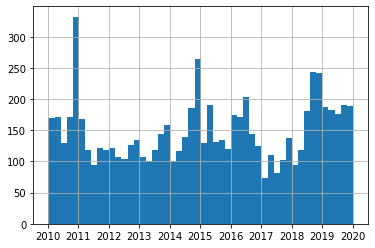

In [96]:
df['show_start_date'].hist(bins=50);

<b> Данные отображаются корректно. Как видим, в датафрейме представлены киноленты за прошедшее десятилетие (с 2010 по 2020 гг.). Любопытно, что пик старта кинокартин пришелся на рубеж 2010-2011 гг. И в среднем, как видно из графика, число фильмов растет к концу года (главное время - новогодние каникулы) и снижается в середине года. </b>

#### `refundable_support	`

In [97]:
df['refundable_support'].isna().sum()

7122

In [98]:
df['refundable_support'].describe()

count         332.000
mean     11864457.831
std      24916555.264
min             0.000
25%             0.000
50%             0.000
75%      15000000.000
max     180000000.000
Name: refundable_support, dtype: float64

В признаке хранятся сведения об объеме возвратных средств государственной поддержки. Пропусков очень много. Логично предположить, что это связано с тем, что в датафрейме не так много фильмов получали господдержку в принципе.

In [99]:
df.query('refundable_support > 0 and production_country != "Россия"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2771,милый ханс дорогой петр,111010715.000,2015-06-23 12:00:00,Художественный,"пассажир, ma.ja.de film production gmbh, al ...","Россия, Германия, Великобритания",а.миндадзе,"а.миндадзе, л.антонова, а.анненский, л.блаватн...",«16+» - для детей старше 16 лет,15000000.000,35000000.000,134000000.000,Фонд кино,5.9,драма,1307120.010
7114,тайна печати дракона,111012819.000,2019-09-12 12:00:00,Художественный,ств; рфг корп; рфг; ао маринс групп интертейме...,Россия-Китай,о.степченко,"с.сельянов, а.петрухин",«6+» - для детей старше 6 лет,180000000.000,90000000.000,2305074303.000,Фонд кино,5.8,"приключения,фэнтези",333597059.590


Итак, все фильмы в данном признаке сняты в России, что только подтверждает мысль выше. Проверим значения на предмет их аномальности. 

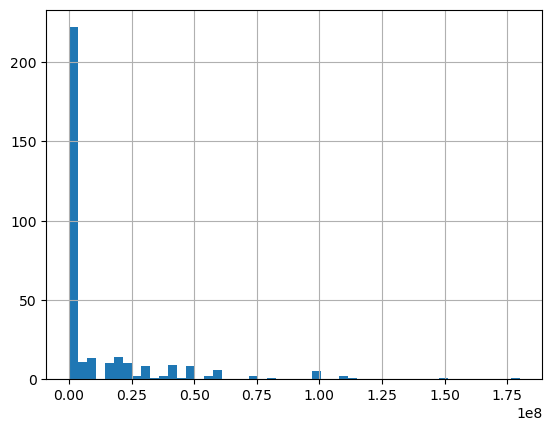

In [22]:
df['refundable_support'].hist(bins=50, range = (0,180000000));

<AxesSubplot:>

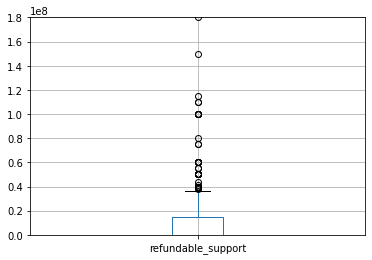

In [101]:
plt.ylim(0,180000000)
df.boxplot('refundable_support')
plt.show()

In [102]:
df.query('refundable_support == 0').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,пока еще жива,111005313.000,2013-10-11 12:00:00,Художественный,ано содействия развитию кинематографии ангел-ф...,Россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.000,26500000.000,79411900.000,Министерство культуры,8.1,"драма,мелодрама",365353.600
1448,бесславные придурки,111003314.000,2014-03-28 12:00:00,Художественный,компания атк-студио,Россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.000,26000000.000,37142857.000,Министерство культуры,NaN,жанр не определен,28140.000
1498,невидимки,111004213.000,2013-09-10 12:00:00,Художественный,компания реал-дакота,Россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.000,107847945.000,176023490.000,Фонд кино,5.3,"комедия,фантастика",19957031.500
1524,берцы,111004314.000,2014-05-05 12:00:00,Художественный,пассажир,Россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.000,28000000.000,40574140.000,Министерство культуры,4.2,драма,55917.500
1792,братья ч,111004414.000,2014-04-23 12:00:00,Художественный,пассажир,Россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.000,25000000.000,40015122.000,Министерство культуры,6.4,драма,232100.000
1854,тайна сухаревой башни чародей равновесия,114000115.000,2015-02-18 12:00:00,Анимационный,мастер-фильм,Россия,с.серегин,а.герасимов,«6+» - для детей старше 6 лет,0.000,25000000.000,51850000.000,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858.600
1871,две женщины,111013714.000,2014-10-02 12:00:00,Художественный,"продюсерский центр хорошо продакшн, rezo produ...","Россия, Франция, Латвия",в.глаголева,н.иванова,«12+» - для детей старше 12 лет,0.000,46502299.000,86210067.000,"Министерство культуры, Фонд кино",6.7,драма,4731239.500
1903,призрак,111001815.000,2015-03-02 12:00:00,Художественный,водород 2011,Россия,а.войтинский,с.сельянов,«6+» - для детей старше 6 лет,0.000,75000000.000,139551503.000,Фонд кино,7.0,"триллер,боевик,приключения",352804320.400
1912,ведьма,111002215.000,2015-03-05 12:00:00,Художественный,ракурс,Россия,д.федоров,в.сидоренко,«16+» - для детей старше 16 лет,0.000,34000000.000,48571430.000,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.500
1991,смайлик,111008614.000,2014-08-08 12:00:00,Художественный,продюсерская киномир,Россия,т.аленикова,т.яковенко,«16+» - для детей старше 16 лет,0.000,25000000.000,36259500.000,Министерство культуры,6.8,мелодрама,554251.000


Много строк, где возвратная поддержка равна нулю. Вероятно, это означает, что фильмы получали госфинансирование, но только на невозвратной основе. 

In [103]:
df.query('refundable_support == 0 and nonrefundable_support == 0').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


В подтверждение теории выше, фильмов где и возвратная, и невозвратная поддержки равна нулю, не имеется. Значит, с "нулевыми" данными все верно. 

In [104]:
df.query('refundable_support >= 60000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2615,савва сердце воина,114001715.000,2015-07-21 12:00:00,Анимационный,"глюкоза продакшн, арт пикчерс студия",Россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000.000,100000000.000,0.000,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.400
3164,герой,111000416.000,2016-01-22 12:00:00,Художественный,"25, медиа арт студио, продюсерский центр синем...",Россия,ю.васильев,"э.айнулова, н.дорошкевич, м.журомская",«12+» - для детей старше 12 лет,110000000.000,30000000.000,222177790.000,"Министерство культуры, Фонд кино",7.1,"мюзикл,боевик,драма",81430626.820
3255,время первых,111001317.000,2017-02-21 12:00:00,Художественный,"таббак, третий рим",Россия,д.киселев,"т.бекмамбетов, е.миронов",«6+» - для детей старше 6 лет,75000000.000,175000000.000,528441977.000,Фонд кино,7.5,"приключения,триллер,биография",544332260.000
3351,дуэлянт,111015416.000,2016-09-14 12:00:00,Художественный,нон-стоп продакшн,Россия,а.мизгирев,"а.роднянский, с.мелькумов",«16+» - для детей старше 16 лет,150000000.000,300000000.000,684200536.000,Фонд кино,6.6,драма,364285139.600
3453,ледокол,111016316.000,2016-10-11 12:00:00,Художественный,продюсерская фирма игоря толстунова,Россия,н.хомерики,"и.толстунов, с.козлов",«12+» - для детей старше 12 лет,100000000.000,200000000.000,430000000.000,Фонд кино,6.5,драма,337069662.800
3558,снежная королева 3 огонь и лёд,114003516.000,2016-11-03 12:00:00,Анимационный,визарт фильм,Россия,а.цицилин,ооо визарт фильм,«6+» - для детей старше 6 лет,60000000.000,100000000.000,243122945.000,Фонд кино,6.1,"мультфильм,комедия,приключения",31517776.730
5437,матильда,111005717.000,2017-08-17 12:00:00,Художественный,"тпо рок, матильда",Россия,а.учитель,"а.учитель, а.достман, в.винокур",«16+» - для детей старше 16 лет,110000000.000,190000000.000,1032905957.000,Фонд кино,7.7,"фэнтези,комедия,семейный",511775548.000
5569,легенда о коловрате,111007617.000,2017-11-30 12:00:00,Художественный,продюсерский центр иван,Россия,и.шурховецкий,"ооо централ партнершип, ао телеко...",«12+» - для детей старше 12 лет,100000000.000,250000000.000,500012729.000,Фонд кино,6.4,"история,боевик,фэнтези",590405065.000
6472,три богатыря и наследница престола,114008818.000,2018-12-15 12:00:00,Анимационный,анимационного кино мельница,Россия,к.бронзит,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,115000000.000,0.000,185500705.000,Фонд кино,6.5,"мультфильм,приключения,семейный",577368853.250
6509,ёлки последние,111023918.000,2018-12-10 12:00:00,Художественный,таббак,Россия,"т.бекмамбетов, а.першин (псевдоним ж.крыжовник...","т.бекмамбетов, г.стрижевская",«6+» - для детей старше 6 лет,75000000.000,25000000.000,179708770.000,Фонд кино,6.9,комедия,701507030.270


С аномально высокими значениями (судя по диаграмме размаха) все также кажется нормальным - за исключением пары фильмов, где бюджеты равны 0 (с этим можно разобраться при изучении соответствующего признака). <b> Оставляем все как есть. </b>

#### `nonrefundable_support`

In [105]:
df['nonrefundable_support'].isna().sum()

7122

In [106]:
df.query('nonrefundable_support >= 0 and production_country != "Россия"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1871,две женщины,111013714.000,2014-10-02 12:00:00,Художественный,"продюсерский центр хорошо продакшн, rezo produ...","Россия, Франция, Латвия",в.глаголева,н.иванова,«12+» - для детей старше 12 лет,0.000,46502299.000,86210067.000,"Министерство культуры, Фонд кино",6.7,драма,4731239.500
2132,битва за севастополь,111001415.000,2015-02-20 12:00:00,Художественный,"новые люди, кинодел",Россия-Украина,с.мокрицкий,"н.мокрицкая, е.олесов",«12+» - для детей старше 12 лет,0.000,27510000.000,131000000.000,Министерство культуры,7.5,"биография,военный,драма",401804461.900
2537,вставай и бейся,111008615.000,2015-05-05 12:00:00,Художественный,лига продакшн,"Россия, Италия",стефано лоренци,"жанфранко пиччоли, надежда горшкова, катерина ...",«18+» - запрещено для детей,0.000,60000000.000,139357211.000,"Министерство культуры, Фонд кино",6.4,драма,144040.000
2580,под электрическими облаками,111008815.000,2015-05-12 12:00:00,Художественный,"метрафильмс, линкед филмс, эппл фильм продакшн","Россия, Украина, Польша",а.герман,а.васильев,«16+» - для детей старше 16 лет,0.000,30000000.000,100274436.000,Министерство культуры,6.0,драма,4568857.300
2771,милый ханс дорогой петр,111010715.000,2015-06-23 12:00:00,Художественный,"пассажир, ma.ja.de film production gmbh, al ...","Россия, Германия, Великобритания",а.миндадзе,"а.миндадзе, л.антонова, а.анненский, л.блаватн...",«16+» - для детей старше 16 лет,15000000.000,35000000.000,134000000.000,Фонд кино,5.9,драма,1307120.010
2784,пингвин нашего времени,111010515.000,2015-06-11 12:00:00,Художественный,"зао ф.а.ф., икс-фильме креатив пул гмбх (х-fil...","Россия, Германия",штефан кромер,"алексей гуськов, штефан арндт, андреа шютте",«16+» - для детей старше 16 лет,0.000,28000000.000,164780000.000,Фонд кино,4.3,"комедия,триллер",739938.000
3352,рай,111015716.000,2016-09-20 12:00:00,Художественный,"продюсерский центр а.с.кончаловского, drife fi...","Россия, Германия",а.кончаловский,"а.кончаловский, ф.дайле",«16+» - для детей старше 16 лет,0.000,35000000.000,287802711.000,Министерство культуры,6.8,"военный,драма,история",51704986.000
5842,спитак,111004018.000,2018-04-20 12:00:00,Художественный,"телесто-фильм, фонд развития национального кино","Россия, Армения",а.котт,"е.гликман, т.варжапетян",«16+» - для детей старше 16 лет,0.000,50000000.000,118000000.000,Министерство культуры,6.2,драма,3363230.230
5964,подвал,111009118.000,2018-11-01 12:00:00,Художественный,"гейт, furia film, 8heads productions",Россия-Словакия-Чехия,и.волошин,"л.филусова, ж.тедеева-калинина, а.воронкова, а...",«18+» - запрещено для детей,0.000,30000000.000,111812387.000,Министерство культуры,6.2,"триллер,криминал",288019.500
6244,юморист,111017918.000,2018-09-26 12:00:00,Художественный,"метрафильмс, компания tasse film, компания sir...","Россия, Латвия, Чешская Республика",м.идов,а.васильев,«16+» - для детей старше 16 лет,0.000,20000000.000,76913058.000,Министерство культуры,6.5,"драма,биография",21363842.530


In [107]:
df['nonrefundable_support'].describe()

count         332.000
mean     48980988.892
std      59980117.923
min             0.000
25%      25000000.000
50%      30000000.000
75%      40375000.000
max     400000000.000
Name: nonrefundable_support, dtype: float64

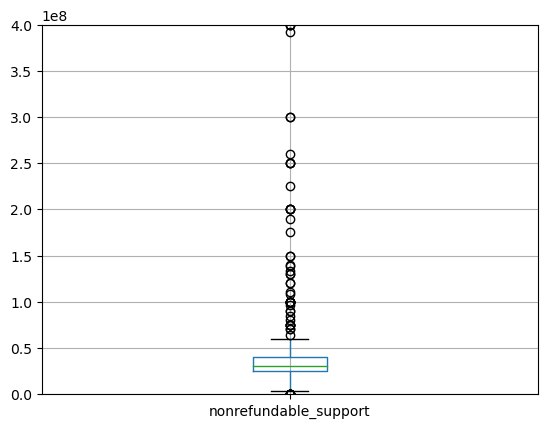

In [23]:
plt.ylim(0,400000000)
df.boxplot('nonrefundable_support')
plt.show()

In [109]:
df.query('nonrefundable_support == 0').head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2532,бармен,111009615.000,2015-05-26 12:00:00,Художественный,"ао вайт медиа, арт пикчерс студия",Россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20000000.000,0.000,0.000,Фонд кино,6.2,"комедия,фэнтези",67418974.800
2683,дабл трабл,111009215.000,2015-05-18 12:00:00,Художественный,"таббак, весёлая компания",Россия,э.оганесян,"т.бекмамбетов, м.затуловская",«12+» - для детей старше 12 лет,44000000.000,0.000,64030080.000,Фонд кино,4.3,"комедия,мелодрама",19654526.300
2733,неуловимые последний герой,111017415.000,2015-09-30 12:00:00,Художественный,"энджой мувиз, ультра стори",Россия,а.аксененко,"г.малков, в.поляков, и.капитонов, в.муругов",«16+» - для детей старше 16 лет,25000000.000,0.000,73379554.000,Фонд кино,3.3,"мелодрама,криминал",11034433.200
3042,крякнутые каникулы,114003615.000,2015-12-22 12:00:00,Анимационный,анимационная рим,Россия,в.лакисов,"р.атоян, в.зорин, о.бровченко",«6+» - для детей старше 6 лет,40000000.000,0.000,399075326.000,Фонд кино,5.4,"мультфильм,комедия,приключения",69693747.930
3224,кухня последняя битва,111001517.000,2017-03-22 12:00:00,Художественный,аврора продакшнс по заказу фильмы навсегда медиа,Россия,а.федотов,"э.илоян, в.шляппо, д.жалинский, а.троцюк, а.ку...",«12+» - для детей старше 12 лет,50000000.000,0.000,162630398.000,Фонд кино,6.0,комедия,334007366.000
5659,три богатыря и принцесса египта,114003317.000,2017-12-21 12:00:00,Анимационный,анимационного кино мельница,Россия,к.феоктистов,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,50000000.000,0.000,174464395.000,Фонд кино,5.5,"мультфильм,приключения,семейный",759226773.000
6472,три богатыря и наследница престола,114008818.000,2018-12-15 12:00:00,Анимационный,анимационного кино мельница,Россия,к.бронзит,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,115000000.000,0.000,185500705.000,Фонд кино,6.5,"мультфильм,приключения,семейный",577368853.250
6627,рассвет,111000419.000,2019-01-31 12:00:00,Художественный,форс медиа,Россия,п.сидоров,"в.северцев, д.литвинов",«16+» - для детей старше 16 лет,35000000.000,0.000,56693559.000,Фонд кино,7.3,"ужасы,боевик",53449711.940
7466,иван царевич и серый волк 4,114005019.000,2019-12-20 12:00:00,Анимационный,анимационного кино мельница,Россия,"д.шмидт, к.феоктистов","с.сельянов, а.боярский",«6+» - для детей старше 6 лет,100000000.000,0.000,190000000.000,Фонд кино,6.7,"мультфильм,приключения,семейный",501069235.000


In [110]:
df.query('nonrefundable_support >= 150000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2699,он дракон,111017915.000,2015-10-14 12:00:00,Художественный,таббак,Россия,и.джендубаев,т.бекмамбетов,«6+» - для детей старше 6 лет,0.000,250000000.000,360000000.000,Фонд кино,6.8,фэнтези,110171448.500
2920,экипаж,111005416.000,2016-03-21 12:00:00,Художественный,тритэ никиты михалкова,Россия,н.лебедев,"л.верещагин, а.златопольский, н.михалков, ооо ...",«6+» - для детей старше 6 лет,50000000.000,392104482.000,635283867.000,Фонд кино,7.6,"драма,триллер,приключения",1402255390.000
3255,время первых,111001317.000,2017-02-21 12:00:00,Художественный,"таббак, третий рим",Россия,д.киселев,"т.бекмамбетов, е.миронов",«6+» - для детей старше 6 лет,75000000.000,175000000.000,528441977.000,Фонд кино,7.5,"приключения,триллер,биография",544332260.000
3351,дуэлянт,111015416.000,2016-09-14 12:00:00,Художественный,нон-стоп продакшн,Россия,а.мизгирев,"а.роднянский, с.мелькумов",«16+» - для детей старше 16 лет,150000000.000,300000000.000,684200536.000,Фонд кино,6.6,драма,364285139.600
3453,ледокол,111016316.000,2016-10-11 12:00:00,Художественный,продюсерская фирма игоря толстунова,Россия,н.хомерики,"и.толстунов, с.козлов",«12+» - для детей старше 12 лет,100000000.000,200000000.000,430000000.000,Фонд кино,6.5,драма,337069662.800
3462,защитники,111000717.000,2017-01-24 12:00:00,Художественный,"энджой мувиз, реновацио интертейнмент",Россия,с.андреасян,"с.андреасян, г.андреасян, в.поляков, а.рязанцев",«12+» - для детей старше 12 лет,50000000.000,150000000.000,323232109.000,Фонд кино,3.0,"фантастика,фэнтези,боевик",262040254.000
3565,притяжение,111018116.000,2016-12-16 12:00:00,Художественный,"водород 2011, арт пикчерс студия",Россия,ф.бондарчук,ооо арт пикчерс студия,«12+» - для детей старше 12 лет,0.000,250000000.000,0.000,Фонд кино,5.6,фантастика,1038321489.000
3610,ёлки 5,111018016.000,2016-12-15 12:00:00,Художественный,таббак,Россия,"т.бекмамбетов, и.джендубаев, а.котт, а.шавкеро...","т.бекмамбетов, и.стромилова, м.затуловская",«6+» - для детей старше 6 лет,0.000,150000000.000,215162287.000,Фонд кино,4.8,"семейный,комедия",308401482.700
3627,большой,111017416.000,2016-11-22 12:00:00,Художественный,зао продюсерская компания валерия тодоровского,Россия,в.тодоровский,"в.тодоровский, а.златопольский",«12+» - для детей старше 12 лет,10000000.000,200000000.000,320000000.000,Фонд кино,8.5,"криминал,комедия,боевик",228578204.000
5437,матильда,111005717.000,2017-08-17 12:00:00,Художественный,"тпо рок, матильда",Россия,а.учитель,"а.учитель, а.достман, в.винокур",«16+» - для детей старше 16 лет,110000000.000,190000000.000,1032905957.000,Фонд кино,7.7,"фэнтези,комедия,семейный",511775548.000


<b> Ситуация один в один с признаком выше, оставляем все как есть. </b>

#### `budget	`

In [111]:
df['budget'].isna().sum()

7122

In [112]:
df.query('budget > 0 and production_country != "Россия"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1871,две женщины,111013714.000,2014-10-02 12:00:00,Художественный,"продюсерский центр хорошо продакшн, rezo produ...","Россия, Франция, Латвия",в.глаголева,н.иванова,«12+» - для детей старше 12 лет,0.000,46502299.000,86210067.000,"Министерство культуры, Фонд кино",6.7,драма,4731239.500
2132,битва за севастополь,111001415.000,2015-02-20 12:00:00,Художественный,"новые люди, кинодел",Россия-Украина,с.мокрицкий,"н.мокрицкая, е.олесов",«12+» - для детей старше 12 лет,0.000,27510000.000,131000000.000,Министерство культуры,7.5,"биография,военный,драма",401804461.900
2537,вставай и бейся,111008615.000,2015-05-05 12:00:00,Художественный,лига продакшн,"Россия, Италия",стефано лоренци,"жанфранко пиччоли, надежда горшкова, катерина ...",«18+» - запрещено для детей,0.000,60000000.000,139357211.000,"Министерство культуры, Фонд кино",6.4,драма,144040.000
2580,под электрическими облаками,111008815.000,2015-05-12 12:00:00,Художественный,"метрафильмс, линкед филмс, эппл фильм продакшн","Россия, Украина, Польша",а.герман,а.васильев,«16+» - для детей старше 16 лет,0.000,30000000.000,100274436.000,Министерство культуры,6.0,драма,4568857.300
2771,милый ханс дорогой петр,111010715.000,2015-06-23 12:00:00,Художественный,"пассажир, ma.ja.de film production gmbh, al ...","Россия, Германия, Великобритания",а.миндадзе,"а.миндадзе, л.антонова, а.анненский, л.блаватн...",«16+» - для детей старше 16 лет,15000000.000,35000000.000,134000000.000,Фонд кино,5.9,драма,1307120.010
2784,пингвин нашего времени,111010515.000,2015-06-11 12:00:00,Художественный,"зао ф.а.ф., икс-фильме креатив пул гмбх (х-fil...","Россия, Германия",штефан кромер,"алексей гуськов, штефан арндт, андреа шютте",«16+» - для детей старше 16 лет,0.000,28000000.000,164780000.000,Фонд кино,4.3,"комедия,триллер",739938.000
3352,рай,111015716.000,2016-09-20 12:00:00,Художественный,"продюсерский центр а.с.кончаловского, drife fi...","Россия, Германия",а.кончаловский,"а.кончаловский, ф.дайле",«16+» - для детей старше 16 лет,0.000,35000000.000,287802711.000,Министерство культуры,6.8,"военный,драма,история",51704986.000
5842,спитак,111004018.000,2018-04-20 12:00:00,Художественный,"телесто-фильм, фонд развития национального кино","Россия, Армения",а.котт,"е.гликман, т.варжапетян",«16+» - для детей старше 16 лет,0.000,50000000.000,118000000.000,Министерство культуры,6.2,драма,3363230.230
5964,подвал,111009118.000,2018-11-01 12:00:00,Художественный,"гейт, furia film, 8heads productions",Россия-Словакия-Чехия,и.волошин,"л.филусова, ж.тедеева-калинина, а.воронкова, а...",«18+» - запрещено для детей,0.000,30000000.000,111812387.000,Министерство культуры,6.2,"триллер,криминал",288019.500
6244,юморист,111017918.000,2018-09-26 12:00:00,Художественный,"метрафильмс, компания tasse film, компания sir...","Россия, Латвия, Чешская Республика",м.идов,а.васильев,«16+» - для детей старше 16 лет,0.000,20000000.000,76913058.000,Министерство культуры,6.5,"драма,биография",21363842.530


Согласно заданию, в этом признаке хранятся сведения о бюджетах только тех фильмов, что получали господдержку. Соответственно, здесь представлены те же самые строки, что и в `refundable_support` и `nonrefundable_support`.

In [113]:
df.query('budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614.000,2014-12-19 12:00:00,Художественный,сентябрь,Россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.000,23000000.000,0.000,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.100
2058,дуxless 2,111000415.000,2015-01-26 12:00:00,Художественный,"слово, арт пикчерс студия",Россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.000,75000000.000,0.000,Фонд кино,6.6,драма,446163511.000
2472,воин,111017315.000,2015-09-28 12:00:00,Художественный,"форпост продакшн, арт пикчерс студия",Россия,а.андрианов,ооо арт пикчерс студия,«12+» - для детей старше 12 лет,10000000.000,70000000.000,0.000,Фонд кино,7.8,"боевик,драма,криминал",196572438.400
2532,бармен,111009615.000,2015-05-26 12:00:00,Художественный,"ао вайт медиа, арт пикчерс студия",Россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20000000.000,0.000,0.000,Фонд кино,6.2,"комедия,фэнтези",67418974.800
2615,савва сердце воина,114001715.000,2015-07-21 12:00:00,Анимационный,"глюкоза продакшн, арт пикчерс студия",Россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000.000,100000000.000,0.000,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.400
2684,тряпичный союз,111010215.000,2015-06-08 12:00:00,Художественный,коктебель,Россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.000,59000000.000,0.000,Фонд кино,6.3,"комедия,драма",1957738.510
2788,срочно выйду замуж,111017115.000,2015-09-30 12:00:00,Художественный,"ао вайт медиа, арт пикчерс студия",Россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.000,35000000.000,0.000,Фонд кино,5.1,"комедия,мелодрама",72937783.200
2874,помню не помню!,111004916.000,2016-03-01 12:00:00,Художественный,кинофирма,Россия,в.ровенский,ооо кинофирма,«12+» - для детей старше 12 лет,0.000,6000000.000,0.000,Министерство культуры,4.3,комедия,15362931.430
3047,любовь с ограничениями,111008216.000,2016-04-29 12:00:00,Художественный,"ао вайт медиа, арт пикчерс студия",Россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,19000000.000,51000000.000,0.000,Фонд кино,6.3,"комедия,мелодрама",70299052.000
3565,притяжение,111018116.000,2016-12-16 12:00:00,Художественный,"водород 2011, арт пикчерс студия",Россия,ф.бондарчук,ооо арт пикчерс студия,«12+» - для детей старше 12 лет,0.000,250000000.000,0.000,Фонд кино,5.6,фантастика,1038321489.000


У 17 фильмов бюджет равен 0. Вероятно, здесь имело место быть какая-либо техническая ошибка. Просто приравнять значения `refundable_support` и `nonrefundable_support`, добавить их к `budget` мы не можем - неизвестно, были ли еще какие то деньги. Таким образом, от этих фильмов проще всего будет избавиться, чтобы не исказить анализ в будущем. 

In [114]:
df.loc[df['budget'] == 0] = None

In [115]:
df.query('(refundable_support + nonrefundable_support) > budget')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Фильмов, где сумма возвратной и невозвратной поддержки была бы выше их бюджета, в датафрейме нет. <b> Таким образом, остальные значения можем оставить как есть. </b>

In [116]:
df = df.dropna(subset =['show_start_date'])

#### `ratings`

In [117]:
df['ratings'].describe()

count     6491
unique      94
top        6.6
freq       310
Name: ratings, dtype: object

In [118]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [119]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [120]:
df['ratings'].describe()

count   6462.000
mean       6.480
std        1.102
min        1.000
25%        5.900
50%        6.600
75%        7.200
max        9.200
Name: ratings, dtype: float64

В некоторых ячейках данные были искажены - цифры были указаны с процентами. Причем неясно, что именно эти проценты означают (например, 98% и 99% явно не могут быть оценками 9.8 и 9.9, т.к. без них у нас максимальное значение - 9.2). Поэтому от этих значений было проще избавиться.

In [121]:
df['ratings'].value_counts()

6.600    310
6.700    307
6.800    260
7.200    251
6.200    241
        ... 
8.900      1
9.200      1
1.900      1
9.100      1
1.300      1
Name: ratings, Length: 80, dtype: int64

In [122]:
df[df['ratings'].isna()].head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,мемуары гейши,121000606.000,2012-12-14 12:00:00,Художественный,"коламбия пикчерз корпорейшн, дримуоркс эскейдж...",США,роб маршалл,"стивен спилберг, люси фишер, дуглас уик, джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,жанр не определен,NaN
150,жди меня,111013615.000,2015-08-25 12:00:00,Художественный,мосфильм,СССР,"а.столпер, б.иванов",неизвестен/отсутствует,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,жанр не определен,NaN
154,дом из песка и тумана,221037813.000,2013-10-25 12:00:00,Художественный,кобальт пикчерз,США,вадим перельман,майкл лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,жанр не определен,NaN
159,жемчужная девушка,224011014.000,2014-08-28 12:00:00,Художественный,"чешское телевидение,три брата агентской фирмы ...",Чехия,владимир дрга,неизвестен/отсутствует,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,жанр не определен,NaN
227,полустанок,111026714.000,2014-12-24 12:00:00,Художественный,мосфильм,СССР,б.барнет,неизвестен/отсутствует,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,жанр не определен,NaN
259,прошлое,221030715.000,2015-07-29 12:00:00,Художественный,"20 сенчюри фокс де архентина, чемо, эйчби филм...",Аргентина - Бразилия,эктор бабенко,"эктор бабенко, оскар крамер, хуго сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,"ужасы,триллер,драма",NaN
264,разбойник и принцесса,224010714.000,2014-08-28 12:00:00,Художественный,чешское телевидение,Чехия,карел смычек,неизвестен/отсутствует,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,жанр не определен,NaN
411,пьетро масканьи сельская честь,126001812.000,2012-05-29 12:00:00,Прочие,эр а и синема,Италия,марио мартоне,ла скала,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,жанр не определен,NaN
412,опера на льду,126001712.000,2012-05-29 12:00:00,Прочие,нексо диджитал,Италия,кристиан биодани,"джиглиола барбьери, паоло де биаси",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,жанр не определен,NaN
427,франческо чилеа адриана лекуврёр,126000412.000,2012-02-07 12:00:00,Прочие,опус арте,Великобритания,дэвид маквикар,дэвид гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,жанр не определен,NaN


In [123]:
df['ratings'].isna().sum()

975

Почти тысяча пропусков, просто удалить эти фильмы не можем. Для дальнейшего анализа будет проще и полезнее заменить пропуски на "-1" - так будет понятно, что сведений о рейтинге не имеется. 

In [124]:
df.query('ratings <= 2')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
515,ночь в супермаркете,124001212.000,2012-05-02 12:00:00,Анимационный,"си 47 продакшнз, лайнс гейт фэмили интертейнме...",США,лоуренс казанофф,"джордж джонсен, лоуренс казанофф, элисон сэвич...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,1.600,"мультфильм,комедия,семейный",620.000
1025,большая ржака,111003512.000,2012-07-23 12:00:00,Художественный,авеста филмс,Россия,в.москаленко,"р.арзуманов, в.малый",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,1.400,комедия,87795.000
1226,зомби каникулы,111001213.000,2013-03-29 12:00:00,Художественный,новая волна,Россия,к.кемниц,с.торчилин,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,1.500,"ужасы,триллер,комедия",NaN
1468,черная роза,111004014.000,2014-04-16 12:00:00,Художественный,"царь, hollywood storm",Россия,а.невский,а.невский,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,1.500,"детектив,триллер,криминал",380.000
1472,джастин бибер believe,126003716.000,2016-06-07 12:00:00,Прочие,"дольфин филмз, бибер тайм филмз, скутер браун ...",США,джон м.чу,"джастин бибер, скутер браун, стюарт форд",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,1.600,"концерт,музыка,документальный",NaN
1473,джастин бибер believe,126004813.000,2013-12-11 12:00:00,Прочие,"дольфин филмз, бибер тайм филмз, скутер браун ...",США,джон м.чу,"джастин бибер, скутер браун, стюарт форд",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,1.600,"концерт,музыка,документальный",NaN
1535,кавказ,111009413.000,2013-11-26 12:00:00,Художественный,"юнайтед мультимедиа проджектс, метрополь",Азербайджан-Россия,фарид гумбатов,"рауф атамалибеков, фарид гумбатов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,1.100,комедия,NaN
1691,7 главных желаний,111009113.000,2013-11-19 12:00:00,Художественный,тпо рок,Россия,в.соколовский,"а.учитель, к.саксаганская",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,1.600,"мелодрама,комедия",6380.000
3374,дизлайк,111012516.000,2016-08-05 12:00:00,Художественный,ангел,Россия,п.руминов,"п.руминов, и.капитонов",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,1.500,ужасы,11066749.180
3515,взломать блогеров,111016616.000,2016-10-28 12:00:00,Художественный,таббак,Россия,м.свешников,т.бекмамбетов,«6+» - для детей старше 6 лет,0.000,25000000.000,36016269.000,Фонд кино,1.000,"комедия,мультфильм,фантастика",7323648.000


Аномальными фильмы с наиболее низкими оценками не кажутся. Можно оставлять как есть.

In [125]:
df['ratings'] = df['ratings'].fillna(-1)

<AxesSubplot:>

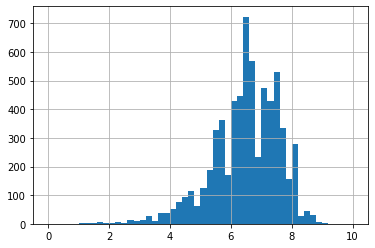

In [126]:
df['ratings'].hist(bins=50, range=(0,10));

<AxesSubplot:>

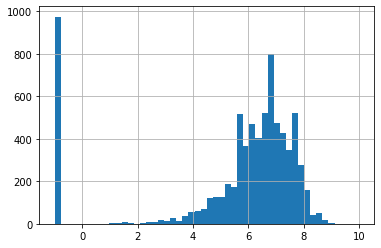

In [127]:
df['ratings'].hist(bins=50, range=(-1,10));

<b> Таким образом, на графиках видно, что фильмов с отрицательным (т.е. пропущенным) рейтингом больше, чем фильмов с самой популярной оценкой 6.6. При этом и в рамках дальнейшего анализа сможем пользоваться только теми данными, которые есть в датафрейме. </b>

#### `box_office`

In [128]:
df['box_office'].describe()

count         3138.000
mean      76082252.508
std      240353641.490
min              0.000
25%          84457.500
50%        2310153.055
75%       23457835.175
max     3073568690.790
Name: box_office, dtype: float64

In [129]:
df[df['box_office'].isna()].head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915.000,2015-11-27 12:00:00,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716.000,2016-09-13 12:00:00,Художественный,мосфильм,СССР,е.матвеев,неизвестен/отсутствует,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN
2,особо опасен,221038416.000,2016-10-10 12:00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916.000,2016-06-10 12:00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815.000,2015-07-29 12:00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
5,остановился поезд,111013816.000,2016-09-13 12:00:00,Художественный,мосфильм,СССР,в.абдрашитов,неизвестен/отсутствует,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.700,драма,NaN
7,любовь и сигареты,221074614.000,2014-12-29 12:00:00,Художественный,"юнайтед артистс, грин стрит филмз, айкон интер...",США,джон туртурро,"джон пенотти, джон туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.600,"мюзикл,мелодрама,комедия",NaN
8,отпетые мошенники,121011416.000,2016-05-05 12:00:00,Художественный,"пульсар продюксьон, тф1 фильм",Франция,эрик беснард,патрис леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.000,"комедия,криминал",NaN
9,отпуск за свой счет,111019114.000,2014-12-01 12:00:00,Художественный,"мосфильм, телевидение внр","СССР, Венгрия",в.титов,неизвестен/отсутствует,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.800,"мелодрама,комедия",NaN
10,превосходство борна,221031416.000,2016-06-29 12:00:00,Художественный,"кеннеди/маршал компани, юниверсал пикчерз, гип...",США,пол грингросс,"патрик кроули, фрэнк маршалл, пол сэндберг",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.700,"боевик,триллер,детектив",NaN


Значения из `box_office` были добавлены из второй таблицы, где фильмов в принципе было меньше. Отсюда и большое число пропусков. Избавиться от них никак можем, поэтому проверим сведения на аномалии. 

<AxesSubplot:>

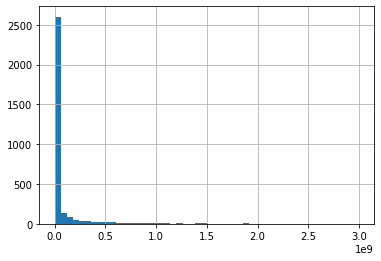

In [130]:
df['box_office'].hist(bins=50, range=(0,3000000000));

<AxesSubplot:>

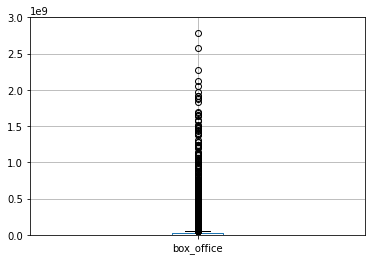

In [131]:
plt.ylim(0,3000000000)
df.boxplot('box_office')
plt.show()

In [132]:
df.query('box_office == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,анна павлова,111011013.000,2013-12-19 12:00:00,Художественный,"совместное производство мосфильм, космос-филм ...","СССР, Франция, Англия, Куба, ГДР",эмиль лотяну,неизвестен/отсутствует,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.700,"драма,биография,музыка",0.000
237,подранки,111007613.000,2013-10-18 12:00:00,Художественный,мосфильм,СССР,н.губенко,неизвестен/отсутствует,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.200,драма,0.000
596,запах вереска,111003012.000,2012-05-23 12:00:00,Художественный,рим,Россия,а.магомедов,"м.балашова, е.миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.300,комедия,0.000
914,в тумане,121027712.000,2012-11-07 12:00:00,Художественный,"ма йа де фикшн, лемминг филм, беларусьфильм, д...",Германия - Нидерланды - Беларусь - Россия - Ла...,сергей лозница,хайно декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.500,"драма,военный,история",0.000
932,письмо для момо,124002912.000,2012-10-25 12:00:00,Анимационный,"кадокава пикчерз, продакшнз и джи, токио броад...",Япония,окиура хироюки,"хироюки икеда, митсухиса ишикава, кацзуя хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.400,"аниме,мультфильм,драма",0.000
933,летние войны,124002812.000,2012-10-25 12:00:00,Анимационный,"медхауз, ниппон телевижн нетуорк корпорейшн, к...",Япония,мамору хосода,"такафуми ватанабэ, такуя ито, сэйдзи окуда, юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.700,"аниме,мультфильм,фантастика",0.000
976,гарегин нжде,131000213.000,2013-04-23 12:00:00,Художественный,"эй джи кей продакшнз, пан армениан медиа групп",Армения,грач кешишян,грач кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.900,биография,0.000
1126,марафон,111006712.000,2012-12-18 12:00:00,Художественный,синема арт студио,Россия,к.оганесян,к.оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.500,"комедия,мелодрама",0.000
1387,экзамен для двоих,121014613.000,2013-06-11 12:00:00,Художественный,депф оф филд,США,пол вайц,"пол вайц, керри кохански, эндрю миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.800,"мелодрама,комедия,драма",0.000
1559,последняя любовь мистера моргана,121002614.000,2014-02-11 12:00:00,Художественный,"камински штим фильм, бавариа пикчерз, сенатор ...",Германия - Бельгия - США -Франция,сандра неттельбек,"франк камински, астрид камке, филипп кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.900,драма,0.000


У 24 фильмов значения сборов равны нулю. Госфинансирование им также не выделялось. Возможно, конечно, эти фильмы и правда ничего не собрали в прокате, но в это верится слабо. Скорее всего, данные были искажены, и мы можем добавить эти строки к отсутствующим значениям.

In [133]:
df.loc[df['box_office'] == 0, 'box_office'] = None

In [134]:
df.query('box_office >= 2000000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2859,зверополис,124000316.000,2016-02-15 12:00:00,Анимационный,"уолт дисней анимейшн студиос, уолт дисней пикчерз",США,"рич мур, байрон ховард",кларк спенсер,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.300,"мультфильм,комедия,криминал",2048126108.000
3488,пираты карибского моря мертвецы не рассказываю...,121009217.000,2017-05-17 12:00:00,Художественный,"джерри брукхаймер филмз, уолт дисней пикчерз, ...",США,"йоаким реннинг, эспен сандберг",джерри брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.600,"фэнтези,боевик,комедия",2118396119.000
5653,движение вверх,111011817.000,2017-12-21 12:00:00,Художественный,тритэ никиты михалкова,Россия,а.мегердичев,"л.верещагин, а.златопольский, н.михалков, ооо ...",«6+» - для детей старше 6 лет,0.000,400000000.000,590192191.000,Фонд кино,7.500,"спорт,драма",2779686144.000
6549,т34,111024918.000,2018-12-21 12:00:00,Художественный,"марс-фильм по заказу мме, амедиа продакшн и ао...",Россия,а.сидоров,"а.златопольский, р.дишдишян, л.блаватник, н.яр...",«12+» - для детей старше 12 лет,60000000.000,120000000.000,563784717.000,Фонд кино,6.500,"драма,военный,боевик",2271754004.520
6820,мстители финал,121005519.000,2019-04-29 12:00:00,Художественный,марвел студиос,США,"джо руссо, энтони руссо",кевин фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"фантастика,боевик,драма",2576613776.830
7456,холоп,111021719.000,2019-12-19 12:00:00,Художественный,мем-медиа по заказу ао вбд груп,Россия,к.шипенко,"э.илоян, д.жалинский, в.дусмухаметов, т.бадзие...",«12+» - для детей старше 12 лет,25000000.000,35000000.000,160000000.000,Фонд кино,6.800,комедия,3073568690.790


<b> Что касается фильмов, собравших в прокате больше всего, то здесь данные похожи на неискаженные. </b>

### Создание новых признаков

In [135]:
df['year'] = df['show_start_date'].dt.year # В year будут храниться сведения о годе выхода фильма

Для создания признаков со сведениями об основном режиссере и жанре создадим функцию, которая будет брать первые значения в соответствующих признаках `director` и `genres`

In [136]:
def first_value(row): 
    value = row.split(sep =',')
    return value[0]

In [137]:
df['main_director'] = df['director'].apply(first_value)

In [138]:
df['main_genre'] = df['genres'].apply(first_value)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7437 entries, 0 to 7485
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7437 non-null   object        
 1   puNumber               7437 non-null   float64       
 2   show_start_date        7437 non-null   datetime64[ns]
 3   type                   7437 non-null   object        
 4   film_studio            7437 non-null   object        
 5   production_country     7437 non-null   object        
 6   director               7437 non-null   object        
 7   producer               7437 non-null   object        
 8   age_restriction        7437 non-null   object        
 9   refundable_support     315 non-null    float64       
 10  nonrefundable_support  315 non-null    float64       
 11  budget                 315 non-null    float64       
 12  financing_source       315 non-null    object        
 13  rat

### Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Сведения о бюджете и господдержке у нас имеются только по 315 российским фильмам. Под господдержкой мы можем понимать сумму сведений в `refundable_support` и `nonrefundable_support` (совокупно, это как раз те деньги, что государство выделило на фильм).  Соответственно, чтобы подсчитать долю поддержки от общего бюджета, мы должны сложить значения и разделить их на `budget`. 

In [140]:
df['budget_share_state_support'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

In [141]:
df['budget_share_state_support'].describe()

count   315.000
mean      0.517
std       0.170
min       0.044
25%       0.373
50%       0.592
75%       0.657
max       0.785
Name: budget_share_state_support, dtype: float64

df.info()

### Промежуточный вывод ко второму пункту

<b> Таким образом, завершили предобработку данных - избавились от неявных дупликатов и пропусков (по возможности), изменили тип данных, создали новые признаки, которые пригодятся позднее. </b>

 ## 3. Исследовательский анализ данных

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [142]:
df['year'].value_counts()

2010    976
2019    925
2018    875
2016    814
2014    804
2015    699
2013    629
2011    620
2012    592
2017    503
Name: year, dtype: int64

In [143]:
df['box_office'].describe()

count         3114.000
mean      76668628.250
std      241185167.054
min             40.000
25%          98128.500
50%        2357735.250
75%       23771435.475
max     3073568690.790
Name: box_office, dtype: float64

<AxesSubplot:>

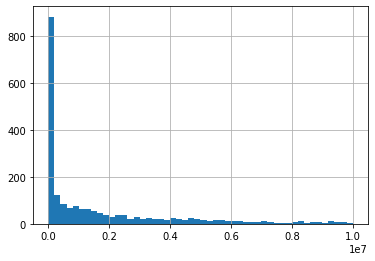

In [144]:
df['box_office'].hist(bins=50, range=(0,10000000))

In [145]:
df['box_office'].value_counts().head(20)

200.000     13
300.000     12
360.000      9
500.000      8
250.000      8
400.000      8
600.000      7
100.000      6
150.000      6
550.000      6
240.000      5
1600.000     5
1700.000     5
420.000      5
120.000      5
450.000      5
1000.000     4
780.000      4
750.000      4
540.000      4
Name: box_office, dtype: int64

В `year` пропуски отсутствуют, но, чтобы точно удостовериться, что фильмы выходили на больших экранах в РФ, возьмем `box_office`. 

In [146]:
df.groupby('year')['box_office'].count().sort_values()

year
2010    101
2011    109
2012    122
2013    179
2014    272
2017    355
2015    456
2018    470
2016    521
2019    529
Name: box_office, dtype: int64

<AxesSubplot:xlabel='year'>

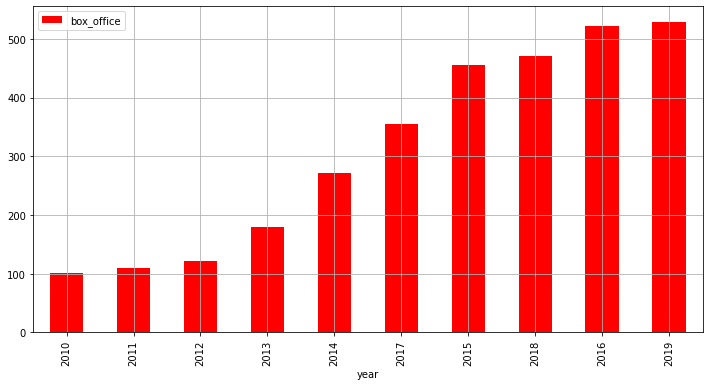

In [147]:
df.pivot_table(index = 'year', values= 'box_office', aggfunc = 'count').sort_values(by='box_office').plot( 
    kind='bar',
    color='red',
    grid=True, 
    figsize=(12, 6),
)

<b> Из графика видно, что число фильмов в РФ с годами растет - если в 2010 году их было 101, то в 2019 в 5 раз больше - 529. Наблюдается спад в 2017 и 2018 гг. - число фильмов за эти промежутки сократилось по сравнению с предыдущими годами. </b> 

In [148]:
print(df['box_office'].isna().sum() / len(df['box_office']))

0.5812827753126261


Пропуски в `box_office` составляют 58%. Соответственно, график выше отображает сведения лишь по 42% фильмов из датафрейма.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<AxesSubplot:xlabel='year'>

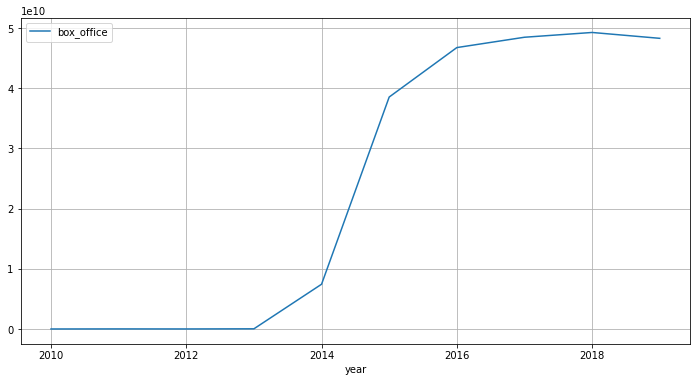

In [149]:
df.pivot_table(index = 'year', values= 'box_office', aggfunc = 'sum').plot(
    kind='line',
    grid=True, 
    figsize=(12, 6),
)

In [150]:
df.groupby('year')['box_office'].sum().sort_values()

year
2010       2428654.000
2012       6911073.000
2011      14102765.000
2013      29799706.200
2014    7434717843.100
2015   38527827199.090
2016   46742121742.480
2019   48278101953.080
2017   48458147253.750
2018   49251950180.200
Name: box_office, dtype: float64

В 2010-2013 гг. сборы фильмов в прокате были минимальными, рост начинается в 2014 г. и продолжается вплоть до 2018 г. В 2019 - спад по сравнению с 2018 и 2017 гг. 

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

<AxesSubplot:xlabel='year'>

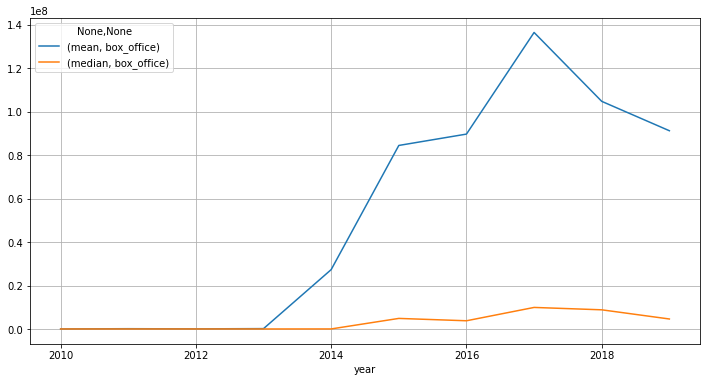

In [151]:
df.pivot_table(index = 'year', values= 'box_office', aggfunc = ['mean','median']).plot(
    kind='line',
    grid=True, 
    figsize=(12, 6),
)

График медианного значения идет достаточно ровно, в то время как среднее значение совершает резкий рост в 2014 г., достигает пика в 2017 г. (медиана в этом году также достигает наивысшей точки) и затем постепенно снижается. До 2013 г. включительно оба графика практически нулевые.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot:xlabel='year'>

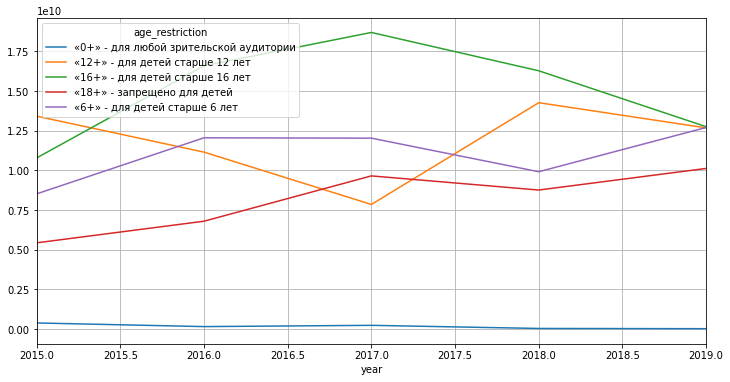

In [152]:
df.pivot_table(index = 'year', columns='age_restriction', values= 'box_office', aggfunc = 'sum').plot(
    kind='line',
    grid=True, 
    figsize=(12, 6),
    xlim = [2015,2019]
)

In [153]:
df.query('2015 <= year <= 2019').groupby('age_restriction')['box_office'].count()

age_restriction
«0+» - для любой зрительской аудитории     89
«12+» - для детей старше 12 лет           343
«16+» - для детей старше 16 лет           797
«18+» - запрещено для детей               791
«6+» - для детей старше 6 лет             311
Name: box_office, dtype: int64

Судя по графику, закономерность между возрастным ограничением аудитории и сборами фильмов все же есть - так, фильмы "18+" чаще всего собирают меньше всего средств (единственное исключение - фильмы "0+", но их значительно меньше, чем остальных). Единственное исключение были в 2017 г., когда фильмы "18+" собрали больше фильмов "12+". Что касается последних, то в 2017 г. у них в целом был значительный спад, после чего произошел бурный рост, и в 2018 г. они обогнали по сборам фильмы "6+". На этом фоне наиболее популярными у аудитории кажутся фильмы "16+", сборы которых планомерно росли до 2017 г., после чего постепенно снижались до 2019. Любопытно, что в итоге в 2019 г. фильмы "6+", "12+" и "16+" собрали примерно одинаково. 

## 4. Фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

<AxesSubplot:xlabel='main_genre'>

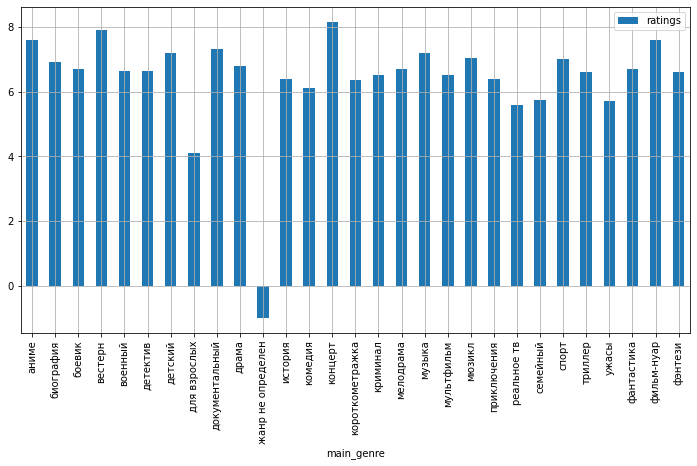

In [154]:
df.pivot_table(index = 'main_genre', values= 'ratings', aggfunc = 'median').plot(
    kind='bar',
    grid=True, 
    figsize=(12, 6),
)

Начнем с оценок фильмам в зависимости от их жанра. Самые высокие - у концертов (единственный жанр, где медианная оценка перевалила за 8 баллов из 10) , нуаров и вестернов. Хуже всего дело обстоит у "реального ТВ" и фильмов для взрослых (чуть больше 4 баллов). 

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7437 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   title                       7437 non-null   object        
 1   puNumber                    7437 non-null   float64       
 2   show_start_date             7437 non-null   datetime64[ns]
 3   type                        7437 non-null   object        
 4   film_studio                 7437 non-null   object        
 5   production_country          7437 non-null   object        
 6   director                    7437 non-null   object        
 7   producer                    7437 non-null   object        
 8   age_restriction             7437 non-null   object        
 9   refundable_support          315 non-null    float64       
 10  nonrefundable_support       315 non-null    float64       
 11  budget                      315 non-null    float64     

In [156]:
rus_budget_movies = df[df['budget'] > 0] # В этом датафрейме будут храниться только те фильмы, что получили господдержку

<AxesSubplot:xlabel='main_genre'>

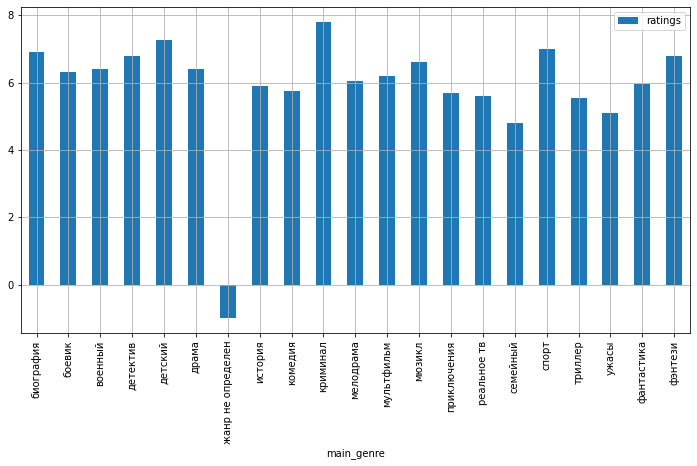

In [157]:
rus_budget_movies.pivot_table(index = 'main_genre', values= 'ratings', aggfunc = 'median').plot(
    kind='bar',
    grid=True, 
    figsize=(12, 6),
)

Теперь также взглянем на медианные оценки фильмов в зависимости от их жанра, но уже только среди получивших господдержку. Наивысшая оценка( почти 8) - у жанра "криминал", затем "спорт" и "биография". Хуже всего дела обстоят у "семейных" фильмов (около 5 баллов). 

<AxesSubplot:>

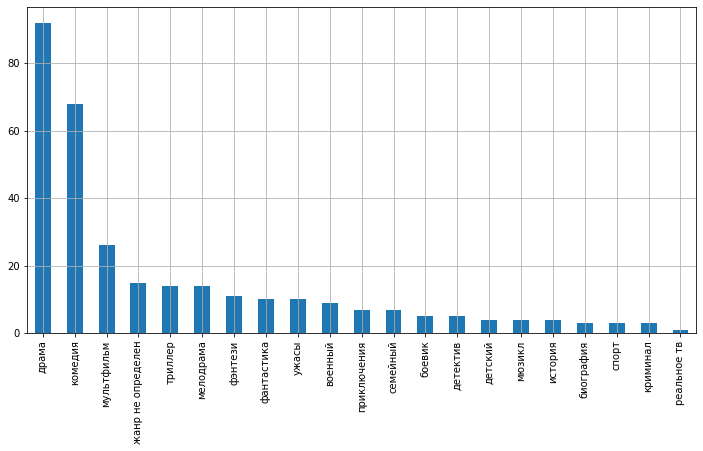

In [158]:
rus_budget_movies['main_genre'].value_counts().plot(
    kind='bar',
    grid=True, 
    figsize=(12, 6),
)

Теперь рассмотрим число фильмов, которые снимаются на бюджетные деньги. Больше всего драм и комедий, меньше всего реального ТВ. 

In [159]:
rus_budget_movies['budget_support'] = rus_budget_movies['refundable_support'] + rus_budget_movies['nonrefundable_support']
# Создадим новый признак 'budget_support' с информацией об итоговой сумме госфинансирования

/tmp/ipykernel_64/2888984218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_budget_movies['budget_support'] = rus_budget_movies['refundable_support'] + rus_budget_movies['nonrefundable_support']


<AxesSubplot:xlabel='main_genre'>

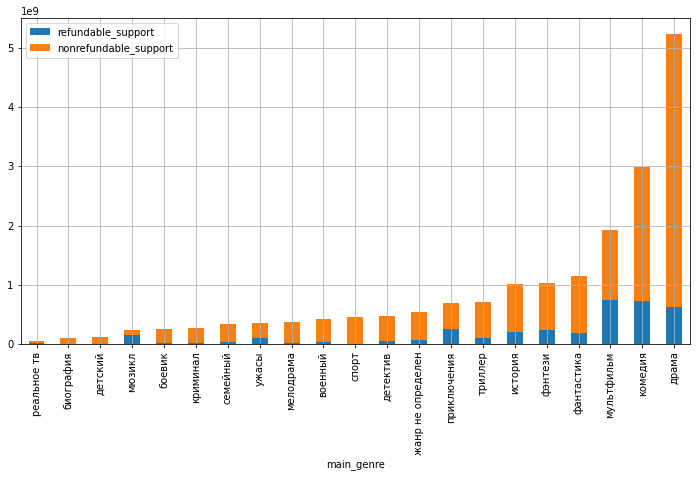

In [160]:
rus_budget_movies.groupby('main_genre').agg('sum').sort_values(by='budget_support').plot(
    kind='bar',
    grid=True, 
    figsize=(12, 6),
    stacked=True,
    y=['refundable_support', 'nonrefundable_support'],
)

График, на котором видно, какая часть фильмов получила возвратную поддержку, а какая - невозвратную.  Фильмов с невозвратной поддержкой гораздо больше, чем с возвратной. Единственное исключение - мюзиклы, но их в целом не так много. 

In [161]:
rus_budget_movies['profit'] = rus_budget_movies['box_office'] - rus_budget_movies['budget_support']
# Признак `profit` с информацией о прибыле фильма

/tmp/ipykernel_64/2255759632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_budget_movies['profit'] = rus_budget_movies['box_office'] - rus_budget_movies['budget_support']


<AxesSubplot:xlabel='main_genre'>

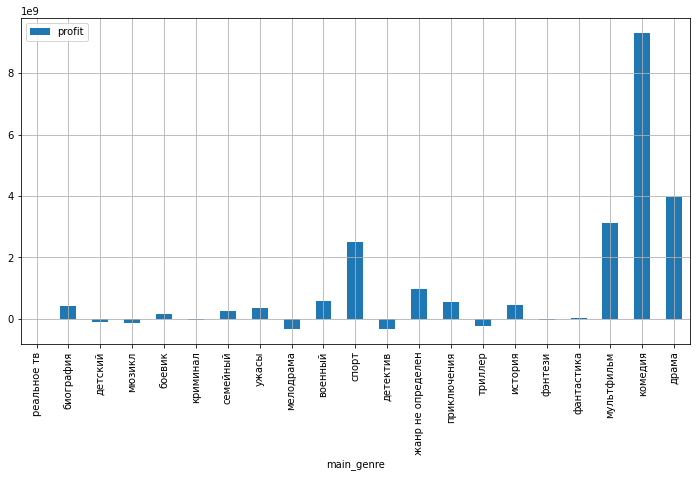

In [162]:
rus_budget_movies.groupby('main_genre').agg('sum').sort_values(by='budget_support').plot(
    kind='bar',
    grid=True, 
    figsize=(12, 6),
    stacked=True,
    y='profit',
)

Таблица окупаемости фильмов в зависимости от жанра. Судя по графику, выгоднее всего вкладывать деньги в комедии, драмы и мультфильмы. Не окупаются мелодрамы, детективы и триллеры.

## 5. Напишите общий вывод

Таким образом, изучен рынок российского кинопроката. Проведена предобработка данных. Число фильмов в РФ с годами растет - если в 2010 году их было 101, то в 2019 в 5 раз больше - 529. В 2010-2013 гг. сборы фильмов в прокате были минимальными, рост начинается в 2014 г. и продолжается вплоть до 2018 г. В 2019 - спад по сравнению с 2018 и 2017 гг. Фильмы "18+" чаще всего собирают меньше всего средств. Наиболее популярными у аудитории кажутся фильмы "16+", сборы которых планомерно росли до 2017 г., после чего постепенно снижались до 2019. Что касается фильмов с привлечением госфинансирования, наивысшие оценки (почти 8) - у картин с жанром "криминал",  "спорт" и "биография". Хуже всего дела обстоят у "семейных" фильмов (около 5 баллов). Чаще всего на бюджетные деньги снимаются (и окупаются) драмы и комедии.